# Кривые проверки в библиотеке Scikit-Learn

In [3]:
from sklearn.datasets import load_iris
import sklearn as skl
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [4]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


def make_data(N, err=1.0, rseed=1):
    # Создаем случайные выборки данных 
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2 
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [7]:
X, y = make_data(40)

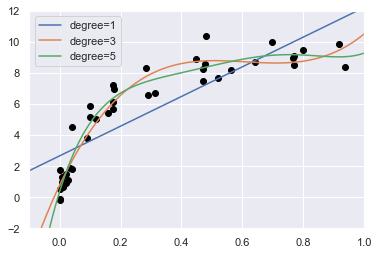

In [8]:

sns.set() # plot formatting 
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc='best');

Text(0, 0.5, 'score')

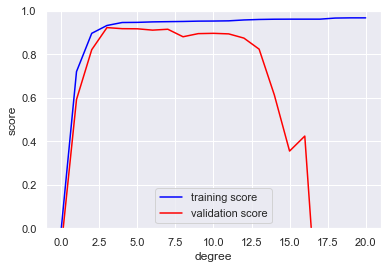

In [14]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1),
         color='blue', label='training score') # Оценка обучения

plt.plot(degree, np.median(val_score, 1),
         color='red', label='validation score') # Оценка проверки

plt.legend(loc='best')
plt.ylim(0, 1) 
plt.xlabel('degree') # Степень
plt.ylabel('score') # оценка

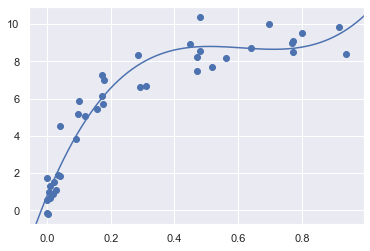

In [12]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

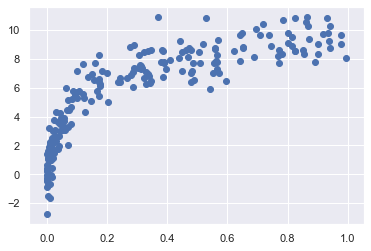

In [15]:
X2, y2 = make_data(200) 
plt.scatter(X2.ravel(), y2);

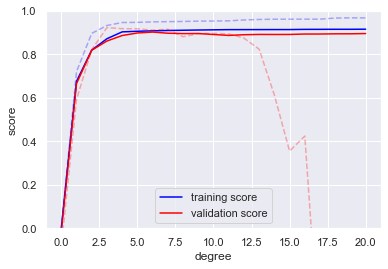

In [16]:
degree = np.arange(21)

train_score2, val_score2 = validation_curve(PolynomialRegression(),
                                            X2, y2, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1),
         color='blue', label='training score')

plt.plot(degree, np.median(val_score2, 1),
         color='red', label='validation score')

plt.plot(degree, np.median(train_score, 1),
         color='blue', alpha=0.3, linestyle='dashed')

plt.plot(degree, np.median(val_score, 1),
         color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [19]:
grid.fit(X, y);

In [20]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

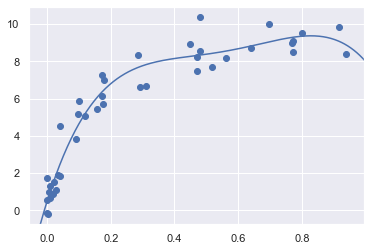

In [22]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test); # hold=True ошибка
plt.axis(lim);